# Clustering & PCA Assignment

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
# Let's read the country-data file into a dataframe
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Inspecting datatypes & non-null objects in each column
df.info()

# Shape of dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


(167, 10)

In [5]:
# Let's inspect the statistics of all continuous variables in the dataset
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Checking for number of null values in each column
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
# Checking for unique / existence of duplicate values
len(df.country.unique().tolist())

167

__Since the number of unique rows is same as the total number of rows in the dataframe, we can infer that there aren't any duplicate values in the dataframe.__

In [8]:
# Parameters such as exports, health and imports are given as a percentage of the total GDP. So, let's calculate the actual
# values for these parameters
df['exports'] = (df['exports']*df['gdpp'])/100
df['imports'] = (df['imports']*df['gdpp'])/100
df['health'] = (df['health']*df['gdpp'])/100

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Outlier Treatment

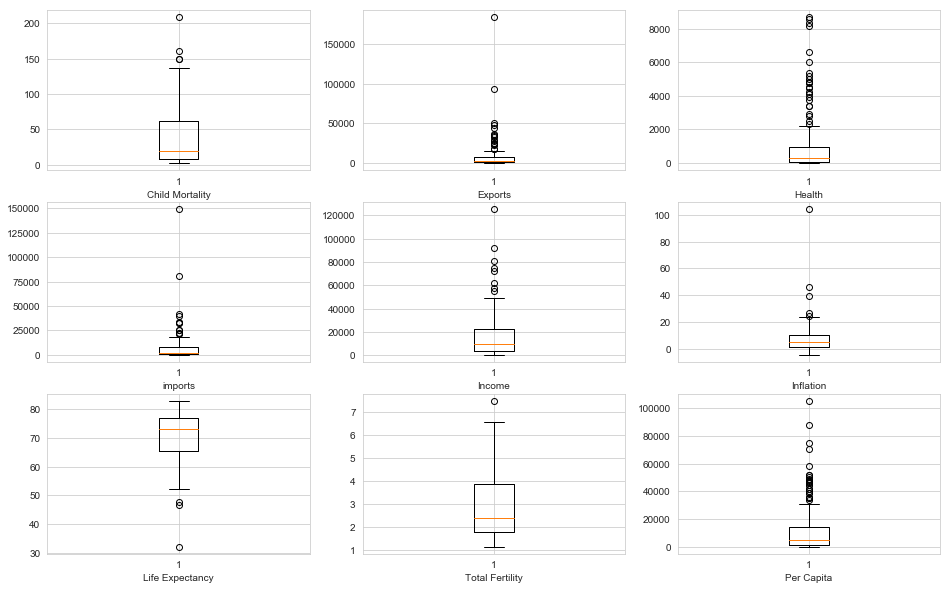

In [10]:
# Checking for existence of outliers in each attribute of the dataframe
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
plt.boxplot(df.child_mort)
plt.xlabel('Child Mortality')
plt.subplot(3,3,2)
plt.boxplot(df.exports)
plt.xlabel('Exports')
plt.subplot(3,3,3)
plt.boxplot(df.health)
plt.xlabel('Health')
plt.subplot(3,3,4)
plt.boxplot(df.imports)
plt.xlabel('imports')
plt.subplot(3,3,5)
plt.boxplot(df.income)
plt.xlabel('Income')
plt.subplot(3,3,6)
plt.boxplot(df.inflation)
plt.xlabel('Inflation')
plt.subplot(3,3,7)
plt.boxplot(df.life_expec)
plt.xlabel('Life Expectancy')
plt.subplot(3,3,8)
plt.boxplot(df.total_fer)
plt.xlabel('Total Fertility')
plt.subplot(3,3,9)
plt.boxplot(df.gdpp)
plt.xlabel('Per Capita')
plt.show()

__The above plots clearly indicate the existence of outliers. Let's remove some of these outliers.__

In [11]:
# Assigning the original dataframe df to a new dataframe df1 for the purpose of outlier treatment.
df1=df

Text(0.5,0,'health')

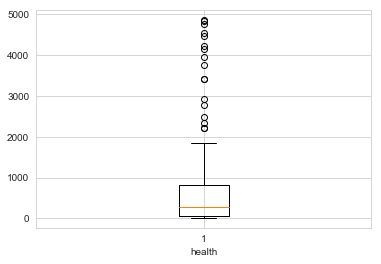

In [12]:
Q3 = df1.health.quantile(0.95)
df1 = df1[df1.health <= Q3]

plt.boxplot(df1.health)
plt.xlabel('health')

Text(0.5,0,'Exports')

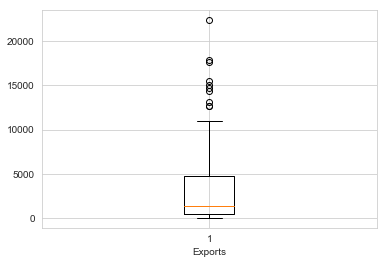

In [13]:
Q3 = df1.exports.quantile(0.95)
df1 = df1[df1.exports <= Q3]

plt.boxplot(df1.exports)
plt.xlabel('Exports')

Text(0.5,0,'Per Capita')

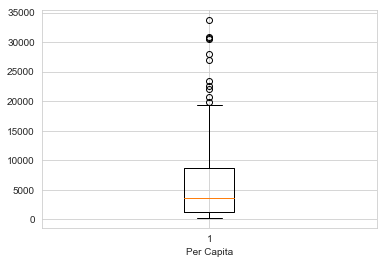

In [14]:
# gdpp has outliers on top of the box plot. Let's remove those outliers which exist above the 95th percentile.
Q3 = df1.gdpp.quantile(0.95)
df1 = df1[df1.gdpp <= Q3]

plt.boxplot(df1.gdpp)
plt.xlabel('Per Capita')

Text(0.5,0,'Inflation')

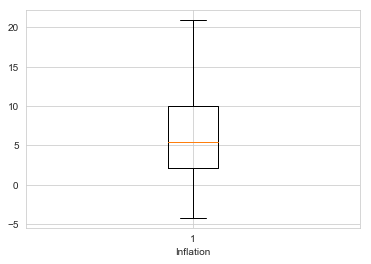

In [15]:
# income has outliers on top of the box plot. Let's remove those outliers which exist above the 95th percentile.
Q3 = df1.inflation.quantile(0.95)
df1 = df1[df1.inflation <= Q3]

plt.boxplot(df1.inflation)
plt.xlabel('Inflation')

Text(0.5,0,'Imports')

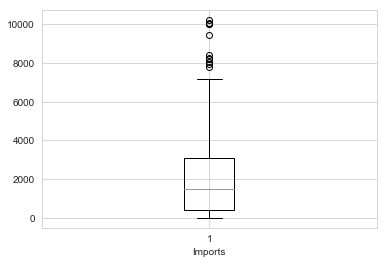

In [16]:
# child_mort has outliers on top of the box plot. Let's remove those outliers which exist above the 95th percentile.
Q3 = df1.imports.quantile(0.95)
df1 = df1[df1.imports <= Q3]

plt.boxplot(df1.imports)
plt.xlabel('Imports')

Text(0.5,0,'Child Mprtality')

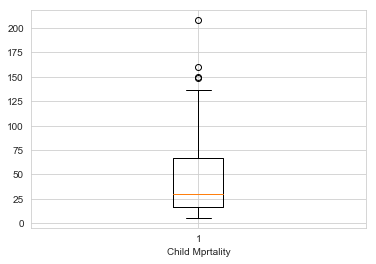

In [17]:
# life_expec has outliers at bottom of the box plot. Let's remove those outliers which exist below the 5th percentile.
Q1 = df1.child_mort.quantile(0.05)
df1 = df1[df1.child_mort >= Q1]

plt.boxplot(df1.child_mort)
plt.xlabel('Child Mprtality')

Text(0.5,0,'Life Expectancy')

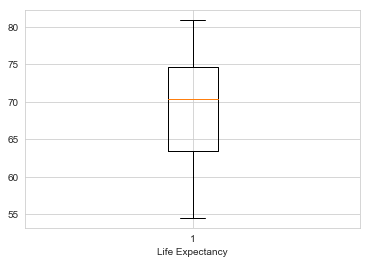

In [18]:
Q1 = df1.life_expec.quantile(0.05)
df1 = df1[df1.life_expec >= Q1]

plt.boxplot(df1.life_expec)
plt.xlabel('Life Expectancy')

Text(0.5,0,'Income')

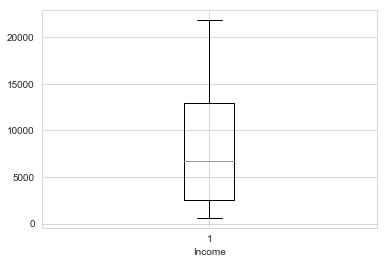

In [19]:
Q3 = df1.income.quantile(0.95)
df1 = df1[df1.income <= Q3]

plt.boxplot(df1.income)
plt.xlabel('Income')

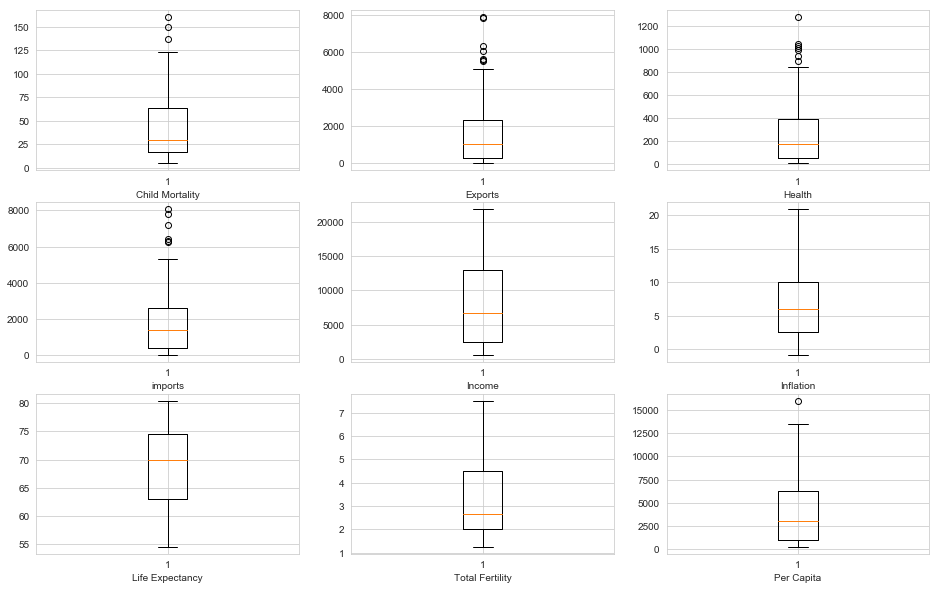

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
plt.boxplot(df1.child_mort)
plt.xlabel('Child Mortality')
plt.subplot(3,3,2)
plt.boxplot(df1.exports)
plt.xlabel('Exports')
plt.subplot(3,3,3)
plt.boxplot(df1.health)
plt.xlabel('Health')
plt.subplot(3,3,4)
plt.boxplot(df1.imports)
plt.xlabel('imports')
plt.subplot(3,3,5)
plt.boxplot(df1.income)
plt.xlabel('Income')
plt.subplot(3,3,6)
plt.boxplot(df1.inflation)
plt.xlabel('Inflation')
plt.subplot(3,3,7)
plt.boxplot(df1.life_expec)
plt.xlabel('Life Expectancy')
plt.subplot(3,3,8)
plt.boxplot(df1.total_fer)
plt.xlabel('Total Fertility')
plt.subplot(3,3,9)
plt.boxplot(df1.gdpp)
plt.xlabel('Per Capita')
plt.show()

__We can still identify some outliers but better than previous. Let's not remove anymore outliers as we might loose data.__

In [21]:
# Shape of the dataset after outlier removal
df1.shape

(109, 10)

## Scaling the data

In [22]:
# Let's apply standard scaler on the attributes and store in dataframe factors.
scaler = StandardScaler()
num_vars = ['child_mort','exports','health','imports','income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
factors = df1[num_vars]
factors[num_vars] = scaler.fit_transform(factors[num_vars])

In [23]:
# Checking the standardised values
factors.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.231937,-0.882944,-0.817918,-0.881841,-1.062558,0.396866,-1.785420,1.705925,-0.967082
1,-0.772462,-0.276074,-0.023465,0.075341,0.300701,-0.496880,1.098021,-1.038153,-0.007953
2,-0.481062,0.039883,-0.311440,-0.247839,0.787345,1.599361,1.126712,-0.222168,0.092379
4,-0.944034,2.177129,1.621023,2.935731,1.803235,-1.047572,1.169749,-0.722288,2.191235
5,-0.829653,0.170211,1.967805,-0.111611,1.737694,2.466024,1.026294,-0.564355,1.676012


In [24]:
# Getting a statistical view of the standardised vatiables
factors.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,-6.722451e-17,-8.148426e-17,3.055660e-17,2.902877e-17,4.277924e-17,1.599129e-16,7.435439e-16,2.077849e-16,6.518741e-17
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-1.074756e+00,-9.131360e-01,-9.202095e-01,-1.018115e+00,-1.226575e+00,-1.454182e+00,-2.029293e+00,-1.288213e+00,-1.054398e+00
25%,-7.561219e-01,-7.750894e-01,-7.792370e-01,-8.037569e-01,-9.200060e-01,-8.345176e-01,-8.242728e-01,-8.012542e-01,-8.491226e-01
50%,-4.184243e-01,-3.528030e-01,-3.325237e-01,-2.517458e-01,-2.269067e-01,-2.260480e-01,1.799107e-01,-3.669396e-01,-2.926819e-01
75%,5.156910e-01,3.846057e-01,4.026575e-01,4.075176e-01,7.873450e-01,4.979768e-01,8.398027e-01,8.438767e-01,5.723502e-01
90%,1.564188e+00,1.568901e+00,1.580298e+00,1.336379e+00,1.537793e+00,1.613805e+00,1.155403e+00,1.412434e+00,1.409181e+00
95%,1.912779e+00,2.167908e+00,2.274353e+00,2.211270e+00,1.832729e+00,1.982137e+00,1.321811e+00,1.849381e+00,2.126154e+00
99%,2.832188e+00,3.381915e+00,2.711850e+00,3.242625e+00,2.130942e+00,2.446524e+00,1.592080e+00,2.210520e+00,2.530739e+00


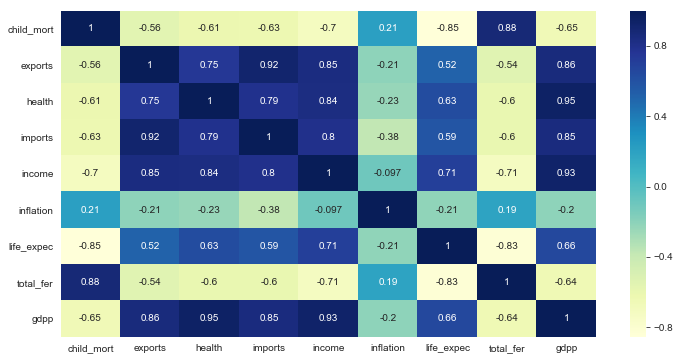

In [25]:
# Let's check for the corelation matrix of the factors over a heat map.
plt.figure(figsize = (12, 6))
sns.heatmap(factors.corr(), annot = True, cmap="YlGnBu")
plt.show()

__We can see some strong correlation between different attributes.__

In [26]:
# Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [27]:
# Applying PCA over the factors dataset
pca.fit(factors)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [28]:
# Principal components
pca.components_

array([[-0.33523706,  0.34554266,  0.35599087,  0.35872121,  0.37428819,
        -0.11666136,  0.32967742, -0.32925193,  0.3768427 ],
       [ 0.43802531,  0.34582258,  0.2042511 ,  0.31589842,  0.05199974,
        -0.31909709, -0.4347311 ,  0.45806632,  0.20901543],
       [ 0.14061102,  0.16472841,  0.11609518, -0.04357611,  0.23906217,
         0.90547256, -0.13253517,  0.11997124,  0.169488  ],
       [ 0.1591342 , -0.51038089,  0.63671706, -0.38880619,  0.03908181,
        -0.0972246 ,  0.16381845,  0.16083483,  0.30647094],
       [-0.1654533 , -0.14684185,  0.18672631, -0.06444934, -0.01036283,
        -0.02504819, -0.7748994 , -0.55317336,  0.06955287],
       [-0.53601024, -0.09980982,  0.3065209 ,  0.37498372, -0.55571673,
         0.18241401, -0.07221285,  0.34220146, -0.06124278],
       [ 0.5750639 , -0.01246104,  0.2171353 ,  0.34273652, -0.45761304,
         0.13739518,  0.22475919, -0.46184321, -0.11147736],
       [-0.07143424,  0.64722504,  0.15996993, -0.59496329, -0

In [29]:
# Variance explained by each principal component
pca.explained_variance_ratio_

array([0.68842754, 0.11588082, 0.10840864, 0.03554269, 0.01811167,
       0.01469244, 0.01125152, 0.00540378, 0.00228091])

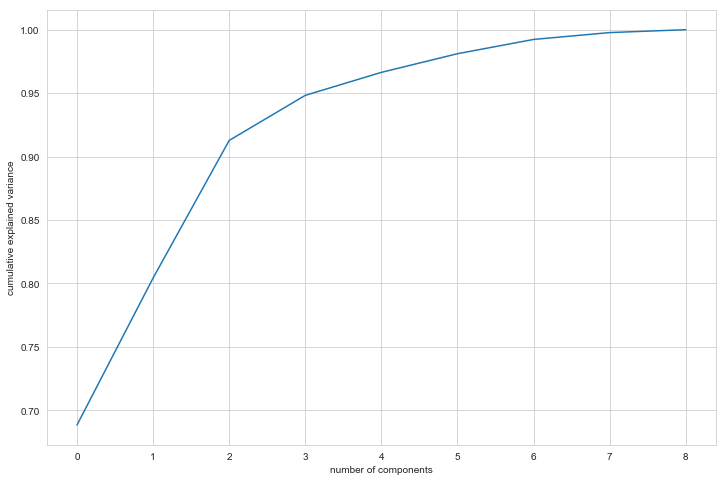

In [30]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

__We can see from the scree plot that 3 principal components can explain approximately 95% of variance.__

In [31]:
# Original variables as a combination of principal components
colnames = list(factors.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.335237,0.438025,0.140611,0.159134
1,exports,0.345543,0.345823,0.164728,-0.510381
2,health,0.355991,0.204251,0.116095,0.636717
3,imports,0.358721,0.315898,-0.043576,-0.388806
4,income,0.374288,0.052000,0.239062,0.039082
5,inflation,-0.116661,-0.319097,0.905473,-0.097225
6,life_expec,0.329677,-0.434731,-0.132535,0.163818
7,total_fer,-0.329252,0.458066,0.119971,0.160835
8,gdpp,0.376843,0.209015,0.169488,0.306471


In [32]:
# Let's go ahead and do dimenstionality reduction using the three Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [33]:
df_pca = pca_final.fit_transform(factors)
df_pca.shape

(109, 3)

In [34]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [35]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2]})

In [36]:
pcs_df2.head()

,PC1,PC2,PC3
0,-3.284331,0.961694,0.355905
1,1.053699,-1.194977,-0.811525
2,0.562497,-1.383538,1.388641
3,4.944357,1.645160,-0.099028
4,2.518196,-0.987528,2.865428


In [37]:
# Correlation matrix of the first five principal components
corrmat = np.corrcoef(df_pca.transpose())

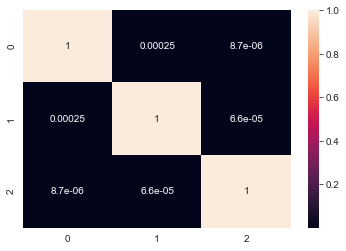

In [38]:
# Let's plot the correlation matrix over a heat map
%matplotlib inline
plt.figure(figsize = (6,4))
sns.heatmap(corrmat,annot = True)

In [39]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0002487459870216312 , min corr:  0.0


In [40]:
pcs_df2.shape

(109, 3)

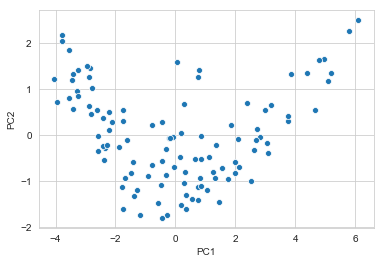

In [41]:
#Visualising the points on the PCs.
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

__Looking at the above scatter plot, we can anticipate a possibity of 3 clusters. But let's check by performing clustering.__

## Clustering

In [42]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.7620918504215097

__Since the value is >0.5 the given dataset has a good tendency to form clusters.__

In [44]:
factors_pca = pcs_df2

In [45]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(factors_pca)
    sse_.append([k, silhouette_score(factors_pca, kmeans.labels_)])

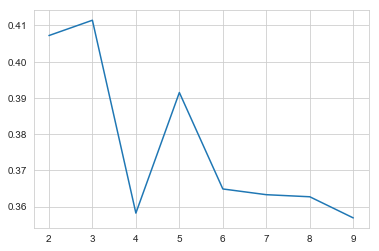

In [46]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

__The above graph suggests 3 clusters. Let's check the elbow curve method as well.__

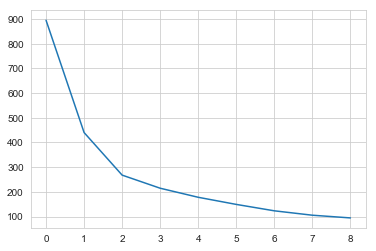

In [47]:
# From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm
# Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(factors_pca)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

__The elbow curve seems to be suggesting 2 clusters. In order to determine the exact number of clusters, let's try both 2 and 3.__

## K-means clustering for K=2

In [48]:
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state =42)
model_clus2.fit(factors_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [49]:
df3 =pcs_df2
df3.index = pd.RangeIndex(len(df3.index))
factors_km = pd.concat([df3, pd.Series(model_clus2.labels_)], axis=1)
factors_km.columns = ['PC1', 'PC2','PC3','ClusterID']
factors_km

,PC1,PC2,PC3,ClusterID
0,-3.284331,0.961694,0.355905,1
1,1.053699,-1.194977,-0.811525,0
2,0.562497,-1.383538,1.388641,0
3,4.944357,1.645160,-0.099028,0
4,2.518196,-0.987528,2.865428,0
5,0.179294,-1.517798,-0.456854,0
6,1.133284,-0.477207,1.512116,0
7,-1.386453,-1.322790,-0.681985,1
8,6.103815,2.489804,0.002720,0
9,2.107936,-0.702035,1.484580,0


In [50]:
# Checking the count for each of the clusters
factors_km['ClusterID'].value_counts()

1    57
0    52
Name: ClusterID, dtype: int64

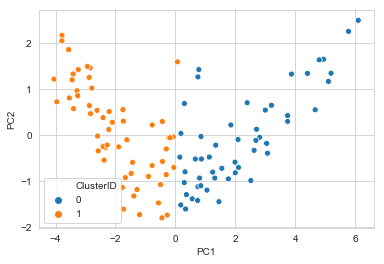

In [51]:
# Let's plot a scatter plot with the principal components and clusterID as a hue
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=factors_km)

In [52]:
# Assigning the cluster to dataframe df1 obtained after outlier analysis
df1.index = pd.RangeIndex(len(df1.index))
df4 = pd.concat([df1, pd.Series(model_clus2.labels_)], axis=1)
df4.columns = ['country', 'child_mort','exports','health','imports','income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']
df4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
4,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0


In [53]:
df4.shape

(109, 11)

### Analysis of Clusters

In [54]:
# analysis of clusters formed
clu_child_mort = 	pd.DataFrame(df4.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(df4.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(df4.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(df4.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(df4.groupby(["ClusterID"]).income.mean())
clu_inflation= 	pd.DataFrame(df4.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(df4.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(df4.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp =  	 pd.DataFrame(df4.groupby(["ClusterID"]).gdpp.mean())

In [55]:
df5 = pd.concat([pd.Series([0,1]),clu_child_mort,clu_exports,clu_health, clu_imports,clu_income, clu_inflation,
               clu_life_expec, clu_total_fer, clu_gdpp ], axis=1)
df5.columns = ['cluster_id','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean', 'inflation_mean', 
               'life_expec_mean', 'total_fer_mean','gdpp_mean']
df5.head()

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,18.548077,2918.718654,480.722596,3129.810577,13310.000000,6.095827,73.919231,2.099423,7074.423077
1,1,69.063158,475.385290,86.499877,684.033984,3337.105263,8.287561,63.835088,4.256842,1423.456140


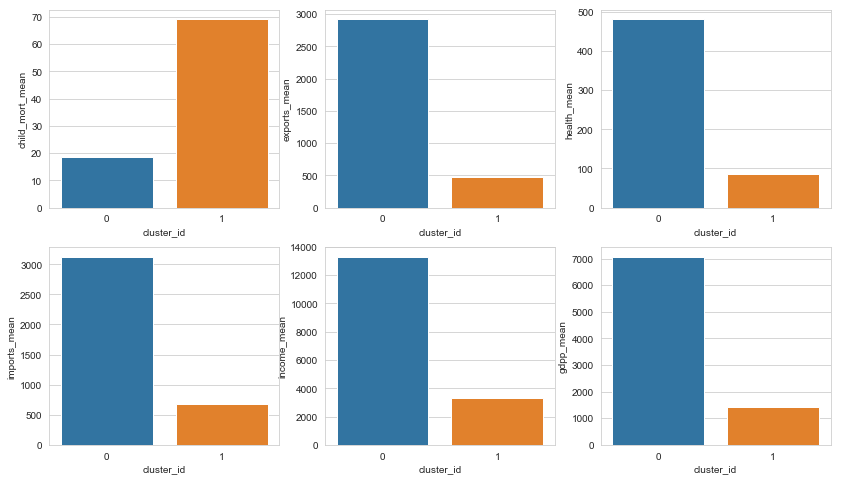

In [56]:
# Let's analyse the clusters against the original variables
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.barplot(x=df5.cluster_id, y=df5.child_mort_mean)

plt.subplot(2,3,2)
sns.barplot(x=df5.cluster_id, y=df5.exports_mean)

plt.subplot(2,3,3)
sns.barplot(x=df5.cluster_id, y=df5.health_mean)

plt.subplot(2,3,4)
sns.barplot(x=df5.cluster_id, y=df5.imports_mean)

plt.subplot(2,3,5)
sns.barplot(x=df5.cluster_id, y=df5.income_mean)

plt.subplot(2,3,6)
sns.barplot(x=df5.cluster_id, y=df5.gdpp_mean)

plt.show()

The above bar plots clearly indicate cluster 1 countries as those which are in dire need for help.Hence: 

* Cluster 0 = Developed / Developing countries
* Cluster 1 = Under-Developed Countries

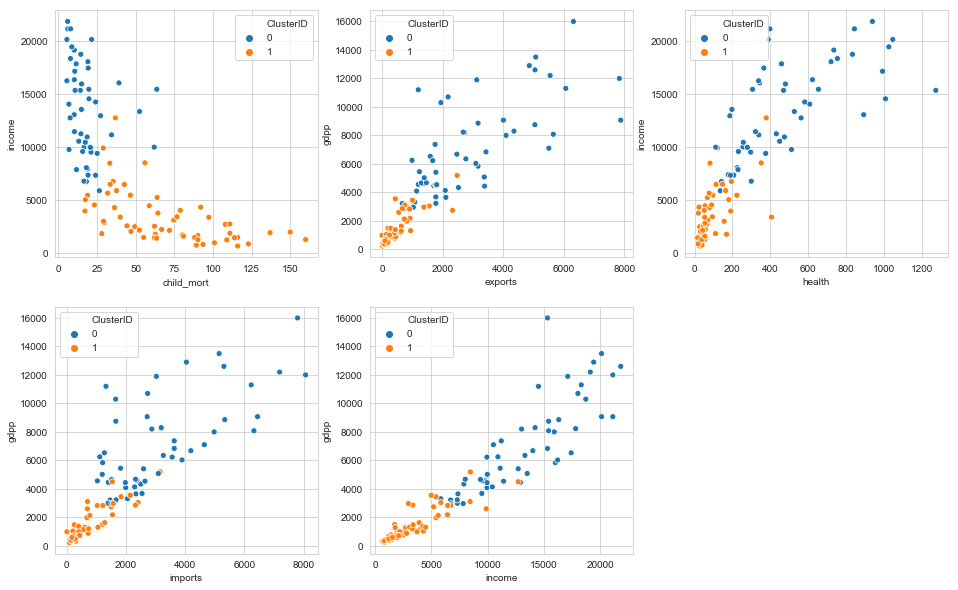

In [57]:
# Let's plot some scatter plots of original variables and see if they can be properly differentiated with the help of the clusters that we formed
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(x='child_mort',y='income',hue ='ClusterID',data=df4)

plt.subplot(2,3,2)
sns.scatterplot(x='exports',y='gdpp',hue ='ClusterID',data=df4)

plt.subplot(2,3,3)
sns.scatterplot(x='health',y='income',hue ='ClusterID',data=df4)

plt.subplot(2,3,4)
sns.scatterplot(x='imports',y='gdpp',hue ='ClusterID',data=df4)

plt.subplot(2,3,5)
sns.scatterplot(x='income',y='gdpp',hue ='ClusterID',data=df4)

plt.show()

__The above clustering looks good but does NOT seem to be the best possible clustering. Cluster 0 seems to have data points which are spreadout. So, let's make the number of clusters as 3.__

## K-means clusetring for K=3

In [58]:
#Let's perform K means using K=3
model_clus3 = KMeans(n_clusters = 3, max_iter=50,random_state =42)
model_clus3.fit(factors_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [59]:
df6 =pcs_df2
df6.index = pd.RangeIndex(len(df6.index))
factors_km3 = pd.concat([df6, pd.Series(model_clus3.labels_)], axis=1)
factors_km3.columns = ['PC1', 'PC2','PC3','ClusterID']
factors_km3

,PC1,PC2,PC3,ClusterID
0,-3.284331,0.961694,0.355905,1
1,1.053699,-1.194977,-0.811525,2
2,0.562497,-1.383538,1.388641,2
3,4.944357,1.645160,-0.099028,0
4,2.518196,-0.987528,2.865428,0
5,0.179294,-1.517798,-0.456854,2
6,1.133284,-0.477207,1.512116,2
7,-1.386453,-1.322790,-0.681985,2
8,6.103815,2.489804,0.002720,0
9,2.107936,-0.702035,1.484580,0


In [60]:
# Checking the count for each of the clusters
factors_km3['ClusterID'].value_counts()

2    52
1    34
0    23
Name: ClusterID, dtype: int64

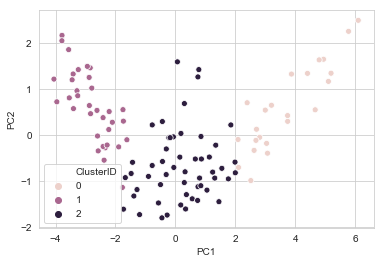

In [61]:
# Let's plot a scatter plot with the principal components and clusterID as a hue
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=factors_km3)

In [62]:
# Assigning the cluster to dataframe df1 obtained after outlier analysis
df1.index = pd.RangeIndex(len(df1.index))
df7 = pd.concat([df1, pd.Series(model_clus3.labels_)], axis=1)
df7.columns = ['country', 'child_mort','exports','health','imports','income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']
df7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
4,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0


In [63]:
df7.shape

(109, 11)

### Analysis of Clusters

In [64]:
# analysis of clusters formed
clu_child_mort = 	pd.DataFrame(df7.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(df7.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(df7.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(df7.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(df7.groupby(["ClusterID"]).income.mean())
clu_inflation= 	pd.DataFrame(df7.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(df7.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(df7.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp =  	 pd.DataFrame(df7.groupby(["ClusterID"]).gdpp.mean())

In [65]:
df8 = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health, clu_imports,clu_income, clu_inflation,
               clu_life_expec, clu_total_fer, clu_gdpp ], axis=1)
df8.columns = ['cluster_id','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean', 'inflation_mean', 
               'life_expec_mean', 'total_fer_mean','gdpp_mean']
df8.head()

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,12.134783,4274.627391,718.643348,4515.272174,17095.652174,5.422522,75.347826,1.897826,9959.130435
1,1,90.520588,263.509853,48.544471,375.186294,1975.441176,8.620441,60.638235,5.140000,830.676471
2,2,29.698077,1376.818587,225.937673,1637.163329,8114.807692,7.145404,70.917308,2.565385,3686.615385


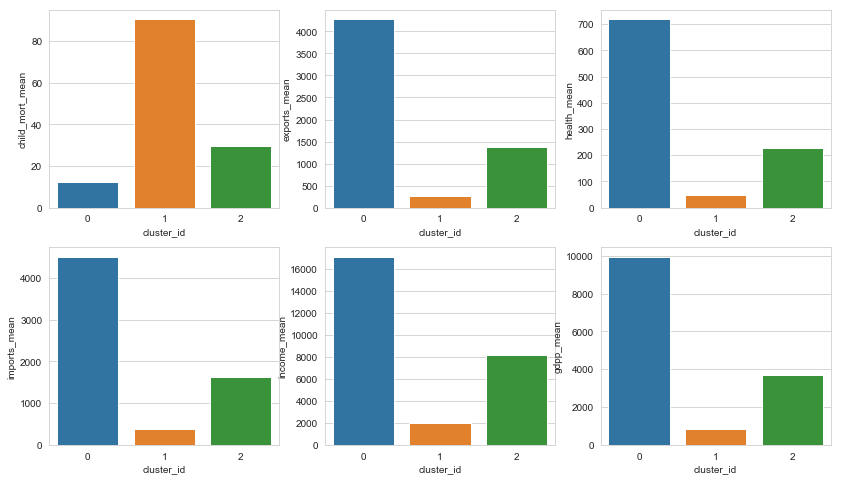

In [66]:
# Let's analyse the clusters against the original variables
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.barplot(x=df8.cluster_id, y=df8.child_mort_mean)

plt.subplot(2,3,2)
sns.barplot(x=df8.cluster_id, y=df8.exports_mean)

plt.subplot(2,3,3)
sns.barplot(x=df8.cluster_id, y=df8.health_mean)

plt.subplot(2,3,4)
sns.barplot(x=df8.cluster_id, y=df8.imports_mean)

plt.subplot(2,3,5)
sns.barplot(x=df8.cluster_id, y=df8.income_mean)

plt.subplot(2,3,6)
sns.barplot(x=df8.cluster_id, y=df8.gdpp_mean)

plt.show()

The above bar plots clearly indicate cluster 1 countries as those which are in dire need for help.Hence: 

* Cluster 0 = Developed 
* Cluster 1 = Under-Developed Countries
* Cluster 2 = Developing countries

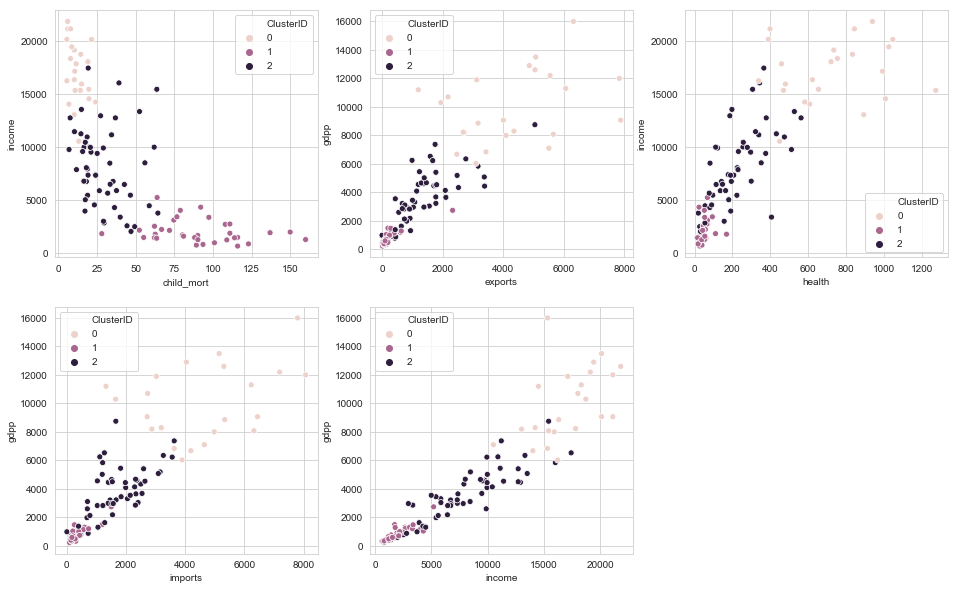

In [67]:
# Let's plot some scatter plots of original variables and see if they can be properly differentiated with the help of the clusters that we formed
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(x='child_mort',y='income',hue ='ClusterID',data=df7)

plt.subplot(2,3,2)
sns.scatterplot(x='exports',y='gdpp',hue ='ClusterID',data=df7)

plt.subplot(2,3,3)
sns.scatterplot(x='health',y='income',hue ='ClusterID',data=df7)

plt.subplot(2,3,4)
sns.scatterplot(x='imports',y='gdpp',hue ='ClusterID',data=df7)

plt.subplot(2,3,5)
sns.scatterplot(x='income',y='gdpp',hue ='ClusterID',data=df7)

plt.show()

__With number of clusters as 3, we can see better differentiation of data point compared to 2. Hence, we will finalize this K-means clustering for K=3.__

In [68]:
# Let's identify which countries belong to cluster 1 in the original dataframe using the concept of binning
# The following factors are used for identifying cluster 1: child_mort,exports, health, imports, income & gdpp
# The cut-off values for each factor is based on the mean values obtained from the df8 dataframe
fin=df[(df['child_mort']>=90.5) & (df['exports']<=263.5) & (df['health']<=48.6) & (df['imports']<=375.2) & (df['income']<=1975.4) & 
       (df['gdpp']<=830.7)]
fin

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.100,58.0,5.34,648
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459
97,Mali,137.0,161.4240,35.2584,248.508,1870,4.370,59.5,6.55,708
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419


In [69]:
# Child Mortality is a by product of poverty and lack of basic amenities such as healthcare. So, we will sort the above fin dataframe
# in the decreasing order of child mortality. These country names would be informed to Help International as the countries in dire need.
fin.sort_values(by=['child_mort'], ascending =False).head().country.tolist()

['Central African Republic',
 'Mali',
 'Niger',
 'Burkina Faso',
 'Congo, Dem. Rep.']

Based on the K-means clustering the countries in dire need of aid are:

* __Central African Republic__
* __Mali__
* __Niger__
* __Burkina Faso__
* __Congo, Dem. Rep.__

## Hierarchial Clustering

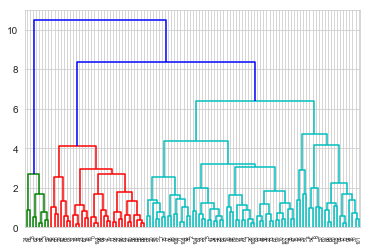

In [70]:
# Let's perform a hierarchial clustering using complete linkage
mergings = linkage(factors_pca, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
# We can see 3 distinct clusters(green, red and blue). Let's cut the dendrogram to obtain 3 clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
factors_hc = pd.concat([factors_pca, clusterCut], axis=1)
factors_hc.columns = ['PC1', 'PC2','PC3','ClusterID']
factors_hc

,PC1,PC2,PC3,ClusterID
0,-3.284331,0.961694,0.355905,0
1,1.053699,-1.194977,-0.811525,1
2,0.562497,-1.383538,1.388641,1
3,4.944357,1.645160,-0.099028,2
4,2.518196,-0.987528,2.865428,1
5,0.179294,-1.517798,-0.456854,1
6,1.133284,-0.477207,1.512116,1
7,-1.386453,-1.322790,-0.681985,1
8,6.103815,2.489804,0.002720,2
9,2.107936,-0.702035,1.484580,1


In [72]:
# Checking the count for each of the clusters
factors_hc['ClusterID'].value_counts()

1    70
0    31
2     8
Name: ClusterID, dtype: int64

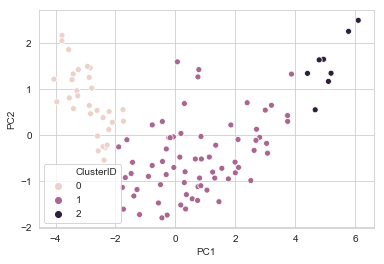

In [73]:
# Let's plot a scatter plot with the principal components and clusterID as a hue
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=factors_hc)

In [74]:
# Assigning the cluster to dataframe df1 obtained after outlier analysis
df1.index = pd.RangeIndex(len(df1.index))
df9 = pd.concat([df1, clusterCut], axis=1)
df9.columns = ['country', 'child_mort','exports','health','imports','income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'ClusterID']
df9.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
4,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1


In [75]:
# analysis of clusters formed
clu_child_mort = 	pd.DataFrame(df9.groupby(["ClusterID"]).child_mort.mean())
clu_exports= 	pd.DataFrame(df9.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(df9.groupby(["ClusterID"]).health.mean())
clu_imports = 	pd.DataFrame(df9.groupby(["ClusterID"]).imports.mean())
clu_income = 	pd.DataFrame(df9.groupby(["ClusterID"]).income.mean())
clu_inflation= 	pd.DataFrame(df9.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(df9.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer = 	pd.DataFrame(df9.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp =  	 pd.DataFrame(df9.groupby(["ClusterID"]).gdpp.mean())

In [76]:
df10 = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health, clu_imports,clu_income, clu_inflation,
               clu_life_expec, clu_total_fer, clu_gdpp ], axis=1)
df10.columns = ['cluster_id','child_mort_mean','exports_mean','health_mean','imports_mean','income_mean', 'inflation_mean', 
               'life_expec_mean', 'total_fer_mean','gdpp_mean']
df10.head()

,cluster_id,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,94.138710,251.930419,46.616987,345.624710,1912.741935,8.535000,60.212903,5.285806,808.870968
1,1,27.375714,1748.737979,306.569549,2011.887444,9526.285714,7.182129,71.568571,2.488429,4633.742857
2,2,8.312500,6081.103750,877.884125,6274.200000,19525.000000,2.755000,75.750000,1.720000,12446.250000


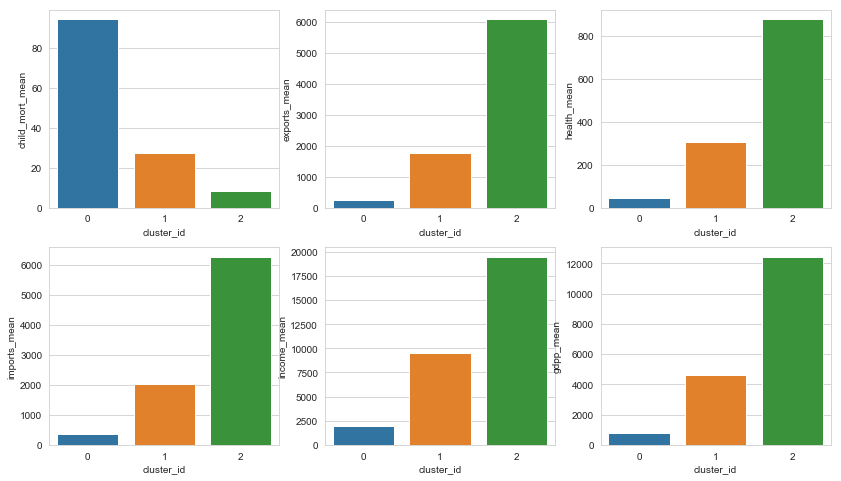

In [77]:
# Let's analyse the clusters against the original variables
plt.figure(figsize=(14,8))
plt.subplot(2,3,1)
sns.barplot(x=df10.cluster_id, y=df10.child_mort_mean)

plt.subplot(2,3,2)
sns.barplot(x=df10.cluster_id, y=df10.exports_mean)

plt.subplot(2,3,3)
sns.barplot(x=df10.cluster_id, y=df10.health_mean)

plt.subplot(2,3,4)
sns.barplot(x=df10.cluster_id, y=df10.imports_mean)

plt.subplot(2,3,5)
sns.barplot(x=df10.cluster_id, y=df10.income_mean)

plt.subplot(2,3,6)
sns.barplot(x=df10.cluster_id, y=df10.gdpp_mean)

plt.show()

The above bar plots clearly indicate cluster 0 countries as those which are in dire need for help.Hence: 

* Cluster 0 = Under-Developed Countries 
* Cluster 1 = Developing countries
* Cluster 2 = Developed Countries

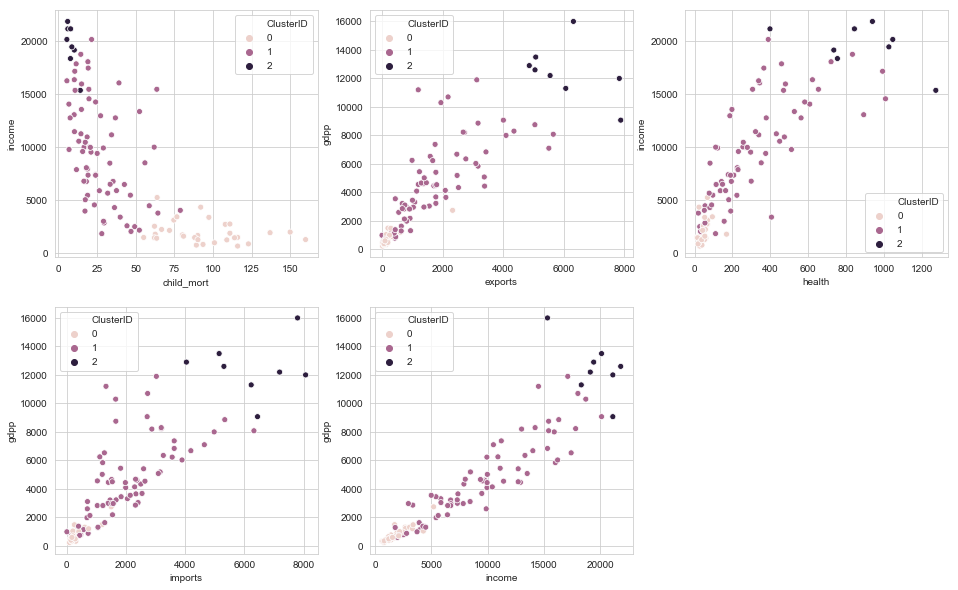

In [78]:
# Let's plot some scatter plots of original variables and see if they can be properly differentiated with the help of the clusters that we formed
plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(x='child_mort',y='income',hue ='ClusterID',data=df9)

plt.subplot(2,3,2)
sns.scatterplot(x='exports',y='gdpp',hue ='ClusterID',data=df9)

plt.subplot(2,3,3)
sns.scatterplot(x='health',y='income',hue ='ClusterID',data=df9)

plt.subplot(2,3,4)
sns.scatterplot(x='imports',y='gdpp',hue ='ClusterID',data=df9)

plt.subplot(2,3,5)
sns.scatterplot(x='income',y='gdpp',hue ='ClusterID',data=df9)

plt.show()

In [79]:
# Let's identify which countries belong to cluster 1 in the original dataframe using the concept of binning
# The following factors are used for identifying cluster 1: child_mort,exports, health, imports, income & gdpp
# The cut-off values for each factor is based on the mean values obtained from the df10 dataframe
fin_hc=df[(df['child_mort']>=94.1) & (df['exports']<=251.9) & (df['health']<=46.6) & (df['imports']<=345.6) & (df['income']<=1912.7) & 
       (df['gdpp']<=808.9)]
fin_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.800,57.5,6.54,334
63,Guinea,109.0,196.344,31.9464,279.936,1190,16.100,58.0,5.34,648
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.970,55.6,5.05,547
97,Mali,137.0,161.424,35.2584,248.508,1870,4.370,59.5,6.55,708
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.640,54.5,5.56,419
112,Niger,123.0,77.256,17.9568,170.868,814,2.550,58.8,7.49,348


In [80]:
# Child Mortality is a by product of poverty and lack of basic amenities such as healthcare. So, we will sort the above fin dataframe
# in the decreasing order of child mortality. These country names would be informed to Help International as the countries in dire need.
fin_hc.sort_values(by=['child_mort'], ascending =False).head().country.tolist()

['Central African Republic',
 'Mali',
 'Niger',
 'Burkina Faso',
 'Congo, Dem. Rep.']

Based on the Hierarchical clusering, countries in dire need of aid are:

* __Central African Republic__
* __Mali__
* __Niger__
* __Burkina Faso__
* __Congo, Dem. Rep.__

It can be observed that both K-means and Hierarchial Clustering have given us the same countries based on the criteria (child_mortality) we choose. Hence, the final 5 countries that would be reported are:

* __Central African Republic__
* __Mali__
* __Niger__
* __Burkina Faso__
* __Congo, Dem. Rep.__